# EM method

In [1]:
import matlab.engine
import numpy as np
from numpy import pi as pi
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
from benchmark_demo.utilstf import *
from benchmark_demo.SignalBank import SignalBank
from benchmark_demo.benchmark_utils import MatlabInterface
from methods.method_EM import NewMethod
import sys
import os

In [2]:
# A test for new methods
np.random.seed(0) 

# signal parameters
SNRin = 20
N = 2**10
# Nsub=N//2
sbank = SignalBank(N=N, return_signal=True)
# s = sbank.signal_cos_chirp()
# s = sbank.signal_mc_multi_linear()
s = sbank.signal_mc_crossing_chirps()
# s = sbank.signal_mc_modulated_tones()
# s = sbank.signal_mc_synthetic_mixture()
# s = sbank.signal_mc_synthetic_mixture_4()
# s = sbank.signal_mc_impulses()
signal, noise = add_snr(s,SNRin)
# signal = s + noise*np.sqrt(N/Nsub) 

snr_out:20.0


In [3]:
Nfft = 2*N
g,_ = get_round_window(Nfft)
S, F = get_spectrogram(signal, window = g)
F = F[0:N+1]

methodml = NewMethod()
funa = methodml.method
# xr = em_method(x,Ncomp,M,L,c,cl,step_Nx,stepg,seuil) <- Give a small value to seuil.
M = N
L = 10
c = 1e-4
cl = 1e-2
seuil = 1e-15
signal_output = funa(signal,[],N,L,c,cl,[],seuil)
print(10*np.log10((np.sum(s**2))/(np.sum((s-signal_output)**2))))

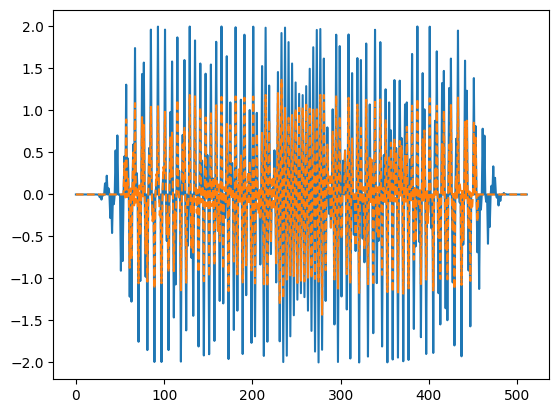

In [ ]:
S_output, F_output= get_spectrogram(signal_output, window = g)
F_output = F_output[0:N+1]

plt.figure()
plt.plot(s)
plt.plot(signal_output,'--')

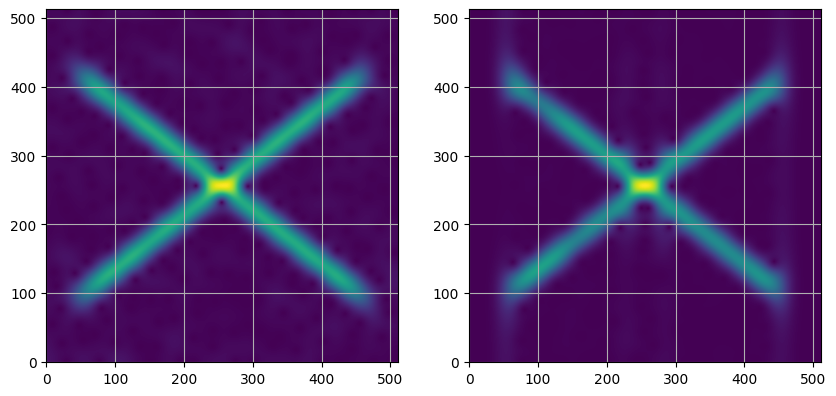

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
ax[0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
ax[0].grid(True)
ax[1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)
ax[1].grid(True)
plt.show()


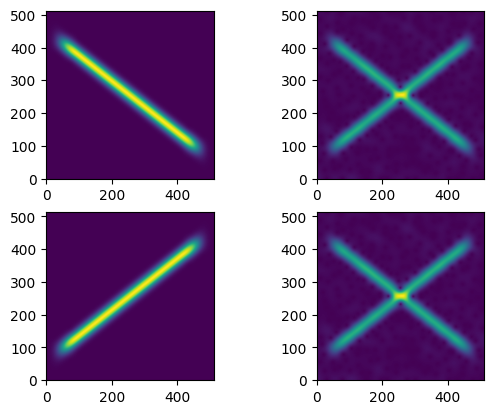

In [ ]:
# xr = em_method(x,Ncomp,M,L,c,cl,step_Nx,stepg,seuil) <- Give a small value to seuil.
signal_output = funa(signal,[],[],[],[],[],[],[],seuil,True)

fig, axs = plt.subplots(signal.total_comps,2)

for i in range(signal.total_comps):
    S, F = get_spectrogram(signal.comps[i], window = g)
    F = F[0:N+1]
    S_output, F_output = get_spectrogram(signal_output[i], window = g)
    F_output = F_output[0:N+1]

    axs[i,0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
    axs[i,1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)

plt.show()

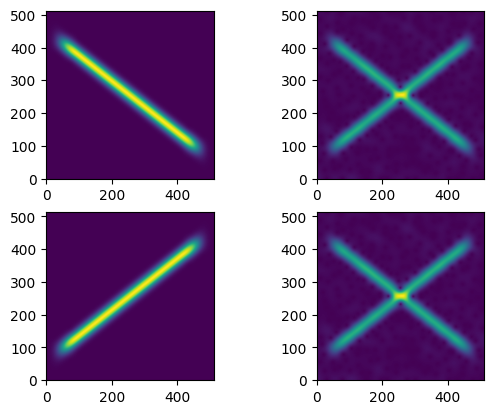

In [ ]:
from benchmark_demo.perf_metrics import order_components

order = order_components(signal_output,signal.comps)

fig, axs = plt.subplots(signal.total_comps,2)

for i in range(signal.total_comps):
    
    S, F = get_spectrogram(signal.comps[i], window = g)
    F = F[0:N+1]
    S_output, F_output = get_spectrogram(signal_output[order[i]], window = g)
    F_output = F_output[0:N+1]

    axs[i,0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
    axs[i,1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)